## RS Oph Gamma-ray Lightcurve - Figure 2 
This notebook remakes figure 2 from the paper: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rcParams["font.family"] = "Helvetica"

In [3]:
def format_func(value, tick_number):
    N = int(np.round(np.log10(value)))
    if N == 0:
        return r"$1$"
    elif N == 1:
        return "$10$"
    elif N == -1:
        return r"$0.1$"
    else:
        return f"$10^{{{N:d}}}$"


In [4]:
lat_data = np.genfromtxt("FermiLAT_LightcurvePoints.txt",skip_header=1)
hess_data = np.genfromtxt("HESS_LightCurvePoints.txt",skip_header=1)

### Define reference time

Choose a reference time of t=0 to be one day before the optical peak (T_0)

In [5]:
time_vmax = 59435.25
start_mjd = 59434.25

### Power-law fit to decay beyond peak flux

In [150]:
def fit_func(x,a,b):
    y = b*(x/5.)**a 
#     y = b*(x/1.)**a 
    return y

In [151]:
popt, pcov = curve_fit(fit_func,lat_data.T[0][2:]-start_mjd,lat_data.T[2][2:]*1e-3,
                               sigma=lat_data.T[3][2:]*1e-3)

print(popt)
print(np.sqrt(np.diag(pcov)))
popt_err = np.sqrt(np.diag(pcov))

[-1.31150418e+00  1.47843782e-12]
[7.20752666e-02 8.90798098e-14]


In [152]:
popth, pcovh = curve_fit(fit_func,hess_data.T[0][2:]-start_mjd,hess_data.T[2][2:],sigma=hess_data.T[3][2:])

print(popth)
print(np.sqrt(np.diag(pcovh)))
popth_err = np.sqrt(np.diag(pcovh))

[-1.42502230e+00  5.59694817e-12]
[1.81660147e-01 5.14510390e-13]


Identify moon break in H.E.S.S. data taking and which Fermi-LAT data points are coincident with H.E.S.S. observations

In [153]:
#Times coincident with HESS are short 6 hour bins
mask_hess = lat_data.T[1]<0.2

In [154]:
moon_start = hess_data.T[0][4]+hess_data.T[1][4]
moon_end = hess_data.T[0][5]-hess_data.T[1][5]
xmoon = np.linspace(moon_start,moon_end,10)

Define ranges for butterfly plots

In [155]:
hx1 = np.linspace(hess_data.T[0][2]-start_mjd,5.,10)
hx2 = np.linspace(5.,hess_data.T[0][-1]-start_mjd,10)

hf0 = fit_func(hx1,popth[0]-popth_err[0],popth[1]+popth_err[1])
hf1 = fit_func(hx1,popth[0]+popth_err[0],popth[1]-popth_err[1])
hf2 = fit_func(hx2,popth[0]-popth_err[0],popth[1]-popth_err[1])
hf3 = fit_func(hx2,popth[0]+popth_err[0],popth[1]+popth_err[1])

fx1 = np.linspace(lat_data.T[0][2]-start_mjd,5.,10)
fx2 = np.linspace(5.,lat_data.T[0][-1]-start_mjd,10)
f0 = fit_func(fx1,popt[0]-popt_err[0],popt[1]+popt_err[1])
f1 = fit_func(fx1,popt[0]+popt_err[0],popt[1]-popt_err[1])
f2 = fit_func(fx2,popt[0]-popt_err[0],popt[1]-popt_err[1])
f3 = fit_func(fx2,popt[0]+popt_err[0],popt[1]+popt_err[1])

### Plot Figure 2

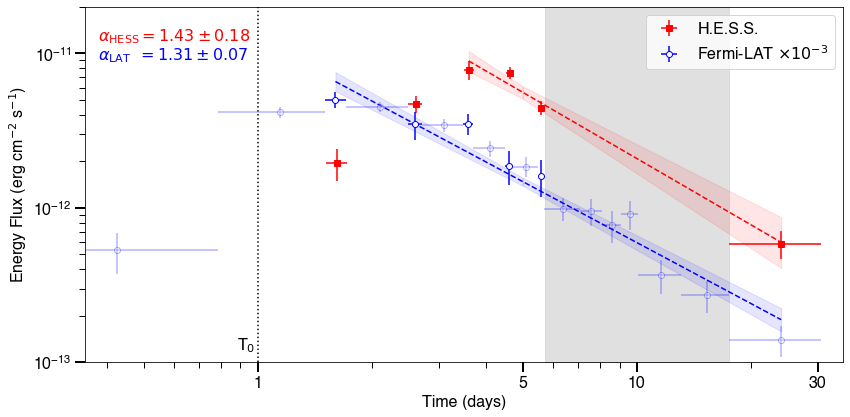

In [158]:
#This is the final plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.errorbar(hess_data.T[0]-start_mjd,hess_data.T[2],yerr=hess_data.T[3],
             xerr=hess_data.T[1],fmt='rs',label=r"H.E.S.S.")

ax1.errorbar(lat_data.T[0][mask_hess]-start_mjd,lat_data.T[2][mask_hess]*1e-3,yerr=lat_data.T[3][mask_hess]*1e-3,
            xerr=lat_data.T[1][mask_hess],fmt='bo',markerfacecolor='white',label=r'Fermi-LAT $\times 10^{-3}$')

ax1.errorbar(lat_data.T[0][~mask_hess]-start_mjd,lat_data.T[2][~mask_hess]*1e-3,yerr=lat_data.T[3][~mask_hess]*1e-3,
            xerr=lat_data.T[1][~mask_hess],fmt='bo',markerfacecolor='white',alpha=0.3)


ax1.set_ylabel(r"Energy Flux (erg cm$^{-2}$ s$^{-1}$)")
ax1.set_xlabel("Time (days)")
ax1.set_ylim(1e-13,2e-11)
ax1.hlines(0.,0.6,40.,linestyles='--')
ax1.set_xlim(0.35,35.)
ax1.set_yscale('log')

plt.xscale('log')

ax1.fill_between(xmoon-start_mjd,1e-13,2e-11,color='lightgray',alpha=0.7)
ax1.legend()

#Plot best fit line
ax1.plot(lat_data.T[0][2:]-start_mjd,fit_func(lat_data.T[0][2:]-start_mjd,popt[0],popt[1]),'b--')
ax1.plot(hess_data.T[0][2:]-start_mjd,fit_func(hess_data.T[0][2:]-start_mjd,popth[0],popth[1]),'r--')

#Shaded error band
ax1.fill_between(fx1,f1,f0,color='blue',alpha=0.1)
ax1.fill_between(fx2,f2,f3,color='blue',alpha=0.1)

ax1.fill_between(hx1,hf1,hf0,color='red',alpha=0.1)
ax1.fill_between(hx2,hf2,hf3,color='red',alpha=0.1)

ax1.vlines(time_vmax-start_mjd,ymin=1e-13,ymax=2e-11,colors='k',linestyles=':')

ax1.text(0.38,0.9e-11,r"$\alpha_{\rm LAT}~\,= 1.31 \pm 0.07$",color='blue')
ax1.text(0.38,1.2e-11,r"$\alpha_{\rm HESS} = 1.43 \pm 0.18$",color='red')
ax1.text(time_vmax-start_mjd-0.12,1.2e-13,r"T$_0$",color='k')

ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(format_func))
plt.tight_layout()
 
plt.xticks(ticks=[1,5,10,30],labels=["1","5","10","30"])

#increase size of ticks 
ax1.tick_params(which='major',length=10,width=2)
ax1.tick_params(which='minor',length=6,width=1)

plt.savefig("JointHESSLAT_lightcurve_RSOph.png",dpi=250)
# 
None